In [124]:
# Experiment 8
#Aim - To write a program in PYTHON to implement JPEG Baseline algorithm
#Name - Param Nagda
#Roll No - C035
#Class - BTech EXTC
#Batch - B2
#Date of Experiment - 16/09/20
#Date of Submission - 16/09/20

In [93]:
import cv2
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct,idct

In [94]:
# Applying dct and idct on an image
img = cv2.imread("Lena.tif",0)

In [104]:
def dct2(a):
    return dct(dct(a,axis=0, norm='ortho'),axis=1,norm='ortho')

def idct2(a):
    return idct(idct(a,axis=0, norm='ortho'),axis=1,norm='ortho')

In [105]:
q = np.array([[16,11,10,16,24,40,51,61],
                   [12,12,14,19,26,58,60,55],
                   [14,13,16,24,40,57,69,56],
                   [14,17,22,29,51,87,80,62],
                   [18,22,37,56,68,109,103,77],
                   [24,35,55,64,81,104,113,92],
                   [49,64,78,87,103,121,120,101],
                   [72,92,95,98,112,100,103,99]])

In [106]:
def jpeg (A):
    #A = A-128
    dct_mat = dct2(A)
    quant=np.divide(dct_mat,q).round().astype(int)
    return quant

def invJPEG (A):
    Ainv = idct2(A).round().astype(int)
    #Ainv = Ainv + 128
    return Ainv

In [110]:
row,col = img.shape
image_quant = np.zeros ((row,col),dtype=int)
for r in range (0,row//8):
    for c in range (0,col//8):
        image_quant[r*8:(r+1)*8, c*8:(c+1)*8]=jpeg(img[r*8:(r+1)*8, c*8:(c+1)*8])

In [111]:
image_inv = np.zeros ((row,col),dtype=int)
for r in range (0,row//8):
    for c in range (0,col//8):
        image_inv[r*8:(r+1)*8, c*8:(c+1)*8]=invJPEG(image_quant[r*8:(r+1)*8, c*8:(c+1)*8])

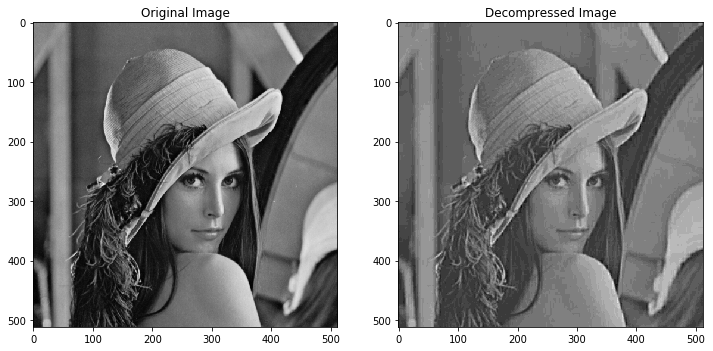

In [113]:
plt.figure(figsize=(12,12))
plt.subplot(121,title='Original Image')
plt.imshow(img,cmap='gray')
plt.subplot(122,title='Decompressed Image')
plt.imshow(image_inv,cmap='gray')

In [120]:
ind,val = np.unique(image_quant.ravel(),return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])

In [121]:
nonzeros

26882

In [122]:
(m*n)/nonzeros

9.751655382784019

### Conclusion: -

JPEG is one of the most popular and comprehensive continuous tone, still frame compression standard. Here we used DCT, quantization and idct techniques for compression. We applied quantization on blocks of 8x8. After obtaining the inverse DCT we found out the compression ratio by dividing total size/no of nonzeros elements. We obtained a CR of 9.75